

### Exploring and visualizing data is an essential step in gaining insights. 

#### Some Questions you can ask your self before exploring the data:
    ### What are the most common words in the entire dataset?
    ### What are the most common words in the dataset for negative and positive tweets, respectively?
    ### How many hashtags are there in a tweet?
    ### Which trends are associated with my dataset?
    ### Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

# Import Libraries

In [1]:
import pandas as pd
import nltk
import csv
import seaborn as sns 
import numpy as np
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

%matplotlib inline

# Read data file

In [2]:
Data_set = pd.read_csv('HateSpeech_Text.csv')

In [3]:
Data_set.head()

,id,label,tweet
0,14,1,@user #cnn calls #michigan middle school 'buil...
1,15,1,no comment! in #australia #opkillingbay #se...
2,18,1,retweet if you agree!
3,24,1,@user @user lumpy says i am a . prove it lumpy.
4,35,1,it's unbelievable that in the 21st century we'...


## Lets preprocess tweets first !

In [4]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt

In [5]:
#  Removing Twitter Handles (@user)
Data_set['tidy_tweet'] = np.vectorize(remove_pattern)(Data_set['tweet'], "@[\w]*") 
Data_set.head(10)

,id,label,tweet,tidy_tweet
0,14,1,@user #cnn calls #michigan middle school 'buil...,#cnn calls #michigan middle school 'build the...
1,15,1,no comment! in #australia #opkillingbay #se...,no comment! in #australia #opkillingbay #se...
2,18,1,retweet if you agree!,retweet if you agree!
3,24,1,@user @user lumpy says i am a . prove it lumpy.,lumpy says i am a . prove it lumpy.
4,35,1,it's unbelievable that in the 21st century we'...,it's unbelievable that in the 21st century we'...
5,57,1,@user lets fight against #love #peace,lets fight against #love #peace
6,69,1,√∞¬ü¬ò¬©the white establishment can't have blk...,√∞¬ü¬ò¬©the white establishment can't have blk...
7,78,1,"@user hey, white people: you can call people '...","hey, white people: you can call people 'white..."
8,83,1,how the #altright uses &amp; insecurity to lu...,how the #altright uses &amp; insecurity to lu...
9,112,1,@user i'm not interested in a #linguistics tha...,i'm not interested in a #linguistics that doe...


In [6]:
# Removing Punctuations, Numbers, and Special Characters
Data_set.tidy_tweet = Data_set.tidy_tweet.str.replace("[^a-zA-Z#]", " ")
Data_set.head(10)

,id,label,tweet,tidy_tweet
0,14,1,@user #cnn calls #michigan middle school 'buil...,#cnn calls #michigan middle school build the...
1,15,1,no comment! in #australia #opkillingbay #se...,no comment in #australia #opkillingbay #se...
2,18,1,retweet if you agree!,retweet if you agree
3,24,1,@user @user lumpy says i am a . prove it lumpy.,lumpy says i am a prove it lumpy
4,35,1,it's unbelievable that in the 21st century we'...,it s unbelievable that in the st century we ...
5,57,1,@user lets fight against #love #peace,lets fight against #love #peace
6,69,1,√∞¬ü¬ò¬©the white establishment can't have blk...,the white establishment can t have blk...
7,78,1,"@user hey, white people: you can call people '...",hey white people you can call people white...
8,83,1,how the #altright uses &amp; insecurity to lu...,how the #altright uses amp insecurity to lu...
9,112,1,@user i'm not interested in a #linguistics tha...,i m not interested in a #linguistics that doe...


In [7]:
# Removing Short Words
Data_set.tidy_tweet = Data_set.tidy_tweet.apply(lambda x: ' '.join([w for w in x.split() if len(w) > 3]))
Data_set.head(10)

,id,label,tweet,tidy_tweet
0,14,1,@user #cnn calls #michigan middle school 'buil...,#cnn calls #michigan middle school build wall ...
1,15,1,no comment! in #australia #opkillingbay #se...,comment #australia #opkillingbay #seashepherd ...
2,18,1,retweet if you agree!,retweet agree
3,24,1,@user @user lumpy says i am a . prove it lumpy.,lumpy says prove lumpy
4,35,1,it's unbelievable that in the 21st century we'...,unbelievable that century need something like ...
5,57,1,@user lets fight against #love #peace,lets fight against #love #peace
6,69,1,√∞¬ü¬ò¬©the white establishment can't have blk...,white establishment have folx running around l...
7,78,1,"@user hey, white people: you can call people '...",white people call people white #race #identity...
8,83,1,how the #altright uses &amp; insecurity to lu...,#altright uses insecurity lure into #whitesupr...
9,112,1,@user i'm not interested in a #linguistics tha...,interested #linguistics that doesn address #ra...


## WordCloud


A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.


In [8]:
all_words = ' '.join([text for text in Data_set['tidy_tweet']])

In [9]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

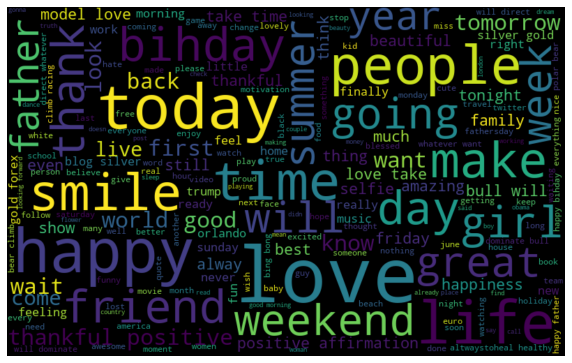

In [10]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Words in non racist/sexist tweets

In [11]:
normal_words =' '.join([text for text in Data_set['tidy_tweet'][Data_set['label'] == 0]])

In [12]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)

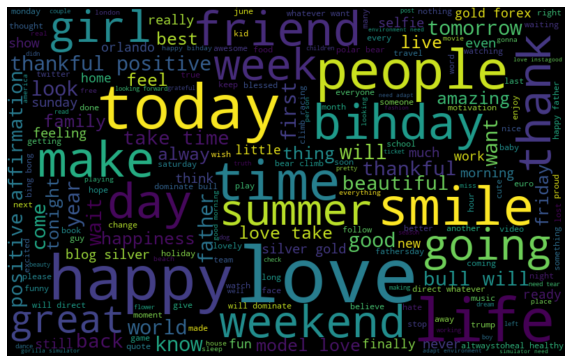

In [13]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Racist/Sexist Tweets

In [14]:
negative_words = ' '.join([text for text in Data_set['tidy_tweet'][Data_set['label'] == 1]])


In [15]:
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)

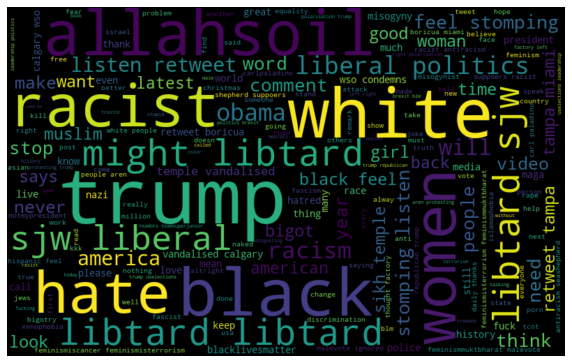

In [16]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Understanding the impact of Hashtags on tweets sentiment

    Hashtags are an indication of the ongoing trends on twitter at any particular point of time. 
    Sometime hashtags can help in distinguishing tweets into the different sentiments.

In [17]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [18]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(Data_set['tidy_tweet'][Data_set['label'] == 0])


In [19]:
# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(Data_set['tidy_tweet'][Data_set['label'] == 1])


In [20]:
# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [21]:
## plot the top n hashtags for the non-racist/sexist tweets.

In [22]:
a = nltk.FreqDist(HT_regular)

df = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

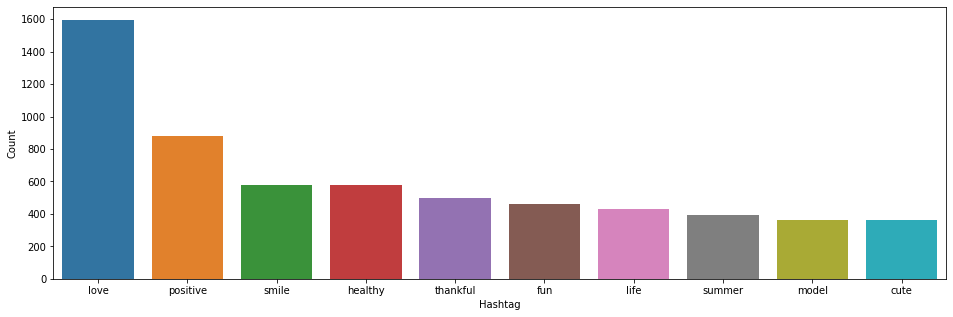

In [23]:
# selecting top 10 most frequent hashtags     
df = df.nlargest(columns="Count", n = 10) 

plt.figure(figsize=(16,5))

ax = sns.barplot(data=df, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [24]:
## plot the top n hashtags for the racist/sexist tweets.

In [25]:
b = nltk.FreqDist(HT_negative)

e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})


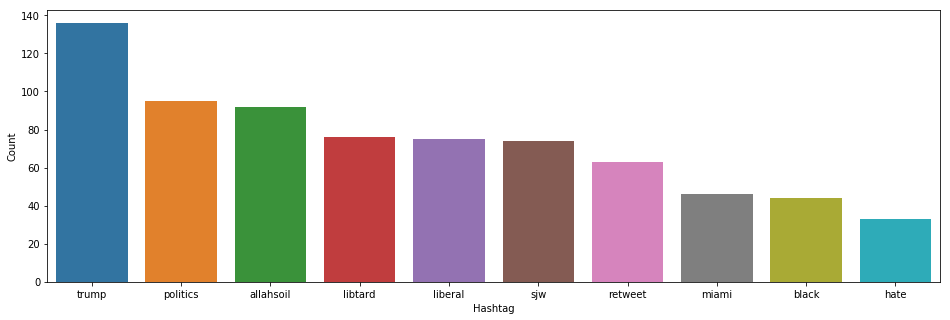

In [37]:
# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   

plt.figure(figsize=(16,5))

ax = sns.barplot(data=e, x= "Hashtag", y = "Count")

ax.set(ylabel = 'Count')
plt.show()
